# Imports

## Import modules

In [313]:
import numpy as np
import pandas as pd
import sys as sys
import mytools.mytools as mt
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Configure column width

In [244]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

## Import data

In [314]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
tt = pd.concat([train, test])

# A look at the data

In [246]:
train.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single family home that contains 1 sq ft and was built in ...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground Floor, Master Suite / Retreat, Walk-in Closet",0.0,NaN,1.0,0.0,0.0,Los Altos,Santa Rita Elementary School,7.0,0.4,NaN,NaN,NaN,Los Altos High School,8.0,1.3,"Tile, Hardwood, Carpet","Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave, Refrigerator, Washer","Washer / Dryer, Inside, In Utility Room","Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 baths, detached 2 car garage with plenty of parking ...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See Remarks","Detached Carport, Garage",4047.0,3,2.0,2.0,872.0,1.0,1.0,Los Angeles,Raymond Avenue Elementary School,3.0,0.8,John Muir Middle School,2.0,1.1,Augustus F. Hawkins High A Critical Design And Gaming,2.0,1.3,NaN,Combination,"Wall/Window Unit(s), Evaporative Cooling, See Remarks",NaN,Inside,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry delight in old Strawberry just about a 3-minute walk to ...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,2,3.0,1.0,1152.0,0.0,0.0,Strawberry,NaN,NaN,NaN,NaN,NaN,NaN,Long Barn High School,NaN,10.1,NaN,Forced air,NaN,NaN,NaN,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterranean conveniently located in Vet's Park close proxi...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,5,3.0,3.0,2612.0,0.0,0.0,Culver City,Farragut Elementary School,9.0,0.2,Culver City Middle School,7.0,0.2,Culver City High School,8.0,0.2,"Wood, Tile",Central,Central Air,Dishwasher,"Stackable, Upper Level","Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,"Beautiful 200 acre ranch land with several pastures, lots of level land, fully fenced with amazi...",VacantLand,NaN,NaN,NaN,0 spaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creston,Santa Margarita Elementary School,6.0,8.5,Atascadero Middle School,5.0,10.2,Atascadero High School,6.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [247]:
test.head()

,Id,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,47439,3034 N Coolidge Ave,Live within steps to the scenic views on the LA River and bike path. Coolidge Place is the epito...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,4.0,3.0,1677.0,4.0,4.0,Los Angeles,Allesandro Elementary School,8.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Vinyl,Central,Central Air,"Dishwasher, Disposal, Microwave, Tankless Water Heater, Water Line to Refrigerator",Stackable,Tandem Uncovered,NaN,NaN,2020-11-06,799900.0,2020-07-01,819000.0,Dodgertown,90090,CA
1,47440,565 Kenilworth Ave,duplex fixer. Input for comps only,SingleFamily,1924.0,Natural Gas,None,Detached,10018.8,3,2.0,NaN,1729.0,2.0,2.0,San Leandro,Roosevelt Elementary School,6.0,0.3,Bancroft Middle School,4.0,0.5,San Leandro High School,5.0,1.2,Wood,Natural Gas,None,NaN,Other,Detached,521977.0,7494.0,2014-04-04,479950.0,2020-11-03,15000.0,San Leandro,94577,CA
2,47441,3028 N Coolidge Ave,Live within steps to the scenic views on the LA River and bike path. Coolidge Place is the epito...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,4.0,3.0,1677.0,4.0,4.0,Los Angeles,Allesandro Elementary School,8.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Vinyl,Central,Central Air,"Dishwasher, Disposal, Microwave, Tankless Water Heater, Water Line to Refrigerator",Stackable,Tandem Uncovered,NaN,NaN,2020-11-12,839900.0,NaN,NaN,Los Angeles,90039,CA
3,47442,3022 N North Coolidge Ave,Live within steps to the scenic views on the LA River and bike path. Coolidge Place is the epito...,SingleFamily,2020.0,Central,Central Air,Tandem Uncovered,940.0,2,4.0,3.0,1609.0,4.0,4.0,Los Angeles,Allesandro Elementary School,8.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,Vinyl,Central,Central Air,"Dishwasher, Disposal, Microwave, Tankless Water Heater, Water Line to Refrigerator",Stackable,Tandem Uncovered,442800.0,5370.0,2020-11-06,809900.0,2020-09-21,810000.0,Dodgertown,90090,CA
4,47443,2515 Admiral Cir,"This beautiful, spacious home built in 2017 is truly one-of-a-kind and maintains its privacy, ba...",SingleFamily,2017.0,Forced Air,Central Air,"Garage Door Opener, Attached",2613.6,4,3.0,NaN,2377.0,2.0,2.0,Hayward,Lorin A. Eden Elementary School,4.0,1.0,Anthony W. Ochoa Middle School,4.0,2.1,Mount Eden High School,5.0,0.7,"Carpet, Tile",Forced Air,Central Air,"Water Filter System, Dishwasher, Disposal, Microwave, Range, Refrigerator",Laundry Room,"Garage Door Opener, Attached",965282.0,12912.0,2020-12-02,1095000.0,2019-12-27,1041000.0,Hayward,94545,CA


NB - lot refers to size of yard; total liveable area the sq. ft..

## Shape

In [248]:
train.shape

(47439, 41)

In [249]:
test.shape

(31626, 40)

## Describing the data

### Train

In [250]:
train.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.00,47439.00,46394.00,33258.00,43974.00,39574.00,44913.00,46523.00,46522.00,42543.00,42697.00,30734.00,30735.00,42220.00,42438.00,43787.00,43129.00,47439.00,29673.00,47439.00
mean,23719.00,1296050.50,1956.63,235338.26,2.36,2.09,5774.59,1.57,1.49,5.72,1.15,5.32,1.69,6.13,2.41,786311.76,9956.84,1315890.33,807853.71,93279.18
std,13694.60,1694452.20,145.80,11925073.92,1.19,0.96,832436.27,9.01,8.96,2.10,2.33,2.00,2.46,1.98,3.60,1157796.05,13884.25,2628695.46,1177902.64,2263.46
min,0.00,100500.00,0.00,0.00,0.00,1.00,1.00,-15.00,-15.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,85611.00
25%,11859.50,565000.00,1946.00,4991.00,2.00,2.00,1187.00,0.00,0.00,4.00,0.30,4.00,0.60,5.00,0.80,254961.50,3467.00,574500.00,335000.00,90220.00
50%,23719.00,960000.00,1967.00,6502.00,2.00,2.00,1566.00,1.00,1.00,6.00,0.50,5.00,1.00,6.00,1.30,547524.00,7129.00,949000.00,598000.00,94114.00
75%,35578.50,1525000.00,1989.00,10454.00,3.00,2.00,2142.00,2.00,2.00,7.00,1.00,7.00,1.80,8.00,2.40,937162.50,12010.00,1498844.00,950000.00,95073.00
max,47438.00,90000000.00,9999.00,1897473600.00,24.00,17.00,176416380.00,1000.00,1000.00,10.00,57.20,9.00,57.20,10.00,73.90,45900000.00,552485.00,402532000.00,90000000.00,96155.00


Suppress scientific notation - https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

In [251]:
train.describe(include=['O'])

,Address,Summary,Type,Heating,Cooling,Parking,Bedrooms,Region,Elementary School,Middle School,High School,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Listed On,Last Sold On,City,State
count,47439,47089,47439,40974,36817,46531,44567,47437,42697,30735,42439,35875,40274,35657,33997,33315,43131,47439,29673,47439,47439
unique,47325,46788,158,1860,541,5113,264,949,1717,488,630,1348,1122,312,4584,1976,4960,2467,6113,929,2
top,55 W 20th Ave,"Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...",SingleFamily,Central,None,"Garage, Garage - Attached, Covered",3,Los Angeles,Laurel Elementary School,Hubert Howe Bancroft Middle School,Fairfax Senior High School,Wood,"Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave, Range / Oven, Refrigerator, Washer",Inside,"Garage, Garage - Attached, Covered",2020-10-16,2017-06-30,Los Angeles,CA
freq,4,18,31324,9593,10072,10392,14943,10338,339,949,1451,4021,8331,12373,2003,3901,10481,286,34,10246,46991


In [252]:
query = train.Summary.dropna().copy() #NaN stops contains search, copied so index could be searched

In [253]:
query[query.str.contains("Neighboring The Ace Hotel")]

5600     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
5730     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
6201     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
7227     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
7242     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
8496     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
9249     Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
10555    Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
11293    Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...
12036    Neighborin

NB - this is a condominium.

#### Function to plot na in dataframe

In [307]:
def plot_na(x):
    missing = x.isna().sum()
    missing = missing[missing>0]
    missing.sort_values(inplace=True)
    return missing.plot(kind='bar', colormap='summer')

<AxesSubplot:>

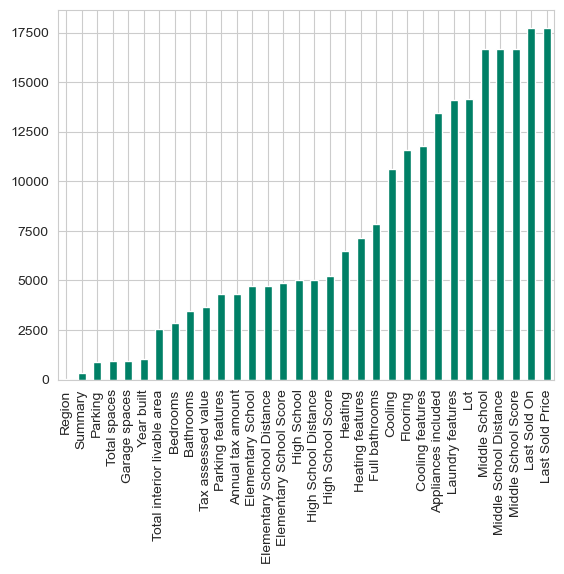

In [308]:
plot_na(train)

### Test

In [309]:
test.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Id,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,31626.00,30729.00,22818.00,29681.00,26563.00,30274.00,30875.00,30876.00,27787.00,27875.00,20052.00,20053.00,29061.00,29452.00,28955.00,28727.00,31626.00,19847.00,31626.00
mean,63251.50,1971.96,564027.66,2.44,2.11,1904.24,2.31,1.99,5.69,1.12,5.15,1.74,6.20,2.26,533271.00,6726.43,873523.29,530488.11,92989.64
std,9129.78,97.84,27784299.28,1.12,0.91,3628.51,18.72,18.65,2.02,1.94,2.05,2.09,1.97,2.81,779003.62,10753.21,1154445.37,651271.16,1779.82
min,47439.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,85611.00
25%,55345.25,1956.00,5400.00,2.00,2.00,1223.00,1.00,1.00,4.00,0.30,3.00,0.70,5.00,0.90,198158.50,2623.00,400110.50,228000.00,91761.00
50%,63251.50,1978.00,7152.50,2.00,2.00,1617.00,2.00,2.00,6.00,0.60,5.00,1.20,6.00,1.50,365013.00,4704.00,619000.00,385000.00,92683.00
75%,71157.75,1996.00,10890.00,3.00,2.00,2203.00,2.00,2.00,7.00,1.10,7.00,2.00,8.00,2.50,613792.00,7869.50,949000.00,614150.00,94561.00
max,79064.00,9999.00,2217378240.00,24.00,24.00,510523.00,3109.00,3109.00,10.00,56.90,10.00,57.00,10.00,58.00,38967556.00,999999.00,42500000.00,18800188.00,96150.00


In [310]:
train.describe(include=['O'])

,Address,Summary,Type,Heating,Cooling,Parking,Bedrooms,Region,Elementary School,Middle School,High School,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Listed On,Last Sold On,City,State
count,47439,47089,47439,40974,36817,46531,44567,47437,42697,30735,42439,35875,40274,35657,33997,33315,43131,47439,29673,47439,47439
unique,47325,46788,158,1860,541,5113,264,949,1717,488,630,1348,1122,312,4584,1976,4960,2467,6113,929,2
top,55 W 20th Ave,"Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los A...",SingleFamily,Central,None,"Garage, Garage - Attached, Covered",3,Los Angeles,Laurel Elementary School,Hubert Howe Bancroft Middle School,Fairfax Senior High School,Wood,"Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave, Range / Oven, Refrigerator, Washer",Inside,"Garage, Garage - Attached, Covered",2020-10-16,2017-06-30,Los Angeles,CA
freq,4,18,31324,9593,10072,10392,14943,10338,339,949,1451,4021,8331,12373,2003,3901,10481,286,34,10246,46991


In [311]:
mt.glance(test)

SHAPE:
(31626, 40)

DESCRIPTION:
             Id Year built            Lot Bathrooms Full bathrooms  \
count  31626.00   30729.00       22818.00  29681.00       26563.00   
mean   63251.50    1971.96      564027.66      2.44           2.11   
std     9129.78      97.84    27784299.28      1.12           0.91   
min    47439.00       0.00           0.00      0.00           1.00   
25%    55345.25    1956.00        5400.00      2.00           2.00   
50%    63251.50    1978.00        7152.50      2.00           2.00   
75%    71157.75    1996.00       10890.00      3.00           2.00   
max    79064.00    9999.00  2217378240.00     24.00          24.00   

      Total interior livable area Total spaces Garage spaces  \
count                    30274.00     30875.00      30876.00   
mean                      1904.24         2.31          1.99   
std                       3628.51        18.72         18.65   
min                          1.00         0.00          0.00   
25%             

<AxesSubplot:>

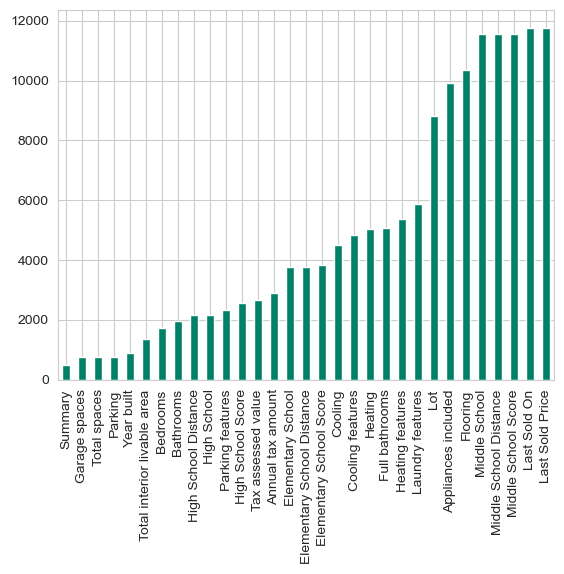

In [312]:
plot_na(test)

## Clean-up

### Removing useless information

In [322]:
tt = tt[['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 
        #'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       #'Middle School', 
        'Middle School Score', 'Middle School Distance',
       #'High School', 
        'High School Score', 'High School Distance', 'Flooring',
       #'Heating features', 'Cooling features',
        'Appliances included',
       'Laundry features', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On',
       'Last Sold Price', 'City', 'Zip', 'State']].copy()

### Columns names

Replace all ' ' in column names with '_'

In [347]:
tt.columns = tt.columns.str.replace(' ', '_')

In [348]:
tt.columns

Index(['Id', 'Address', 'Sold_Price', 'Summary', 'Type', 'Year_built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full_bathrooms', 'Total_interior_livable_area', 'Total_spaces',
       'Garage_spaces', 'Region', 'Elementary_School_Score',
       'Elementary_School_Distance', 'Middle_School_Score',
       'Middle_School_Distance', 'High_School_Score', 'High_School_Distance',
       'Flooring', 'Appliances_included', 'Laundry_features',
       'Parking_features', 'Tax_assessed_value', 'Annual_tax_amount',
       'Listed_On', 'Listed_Price', 'Last_Sold_On', 'Last_Sold_Price', 'City',
       'Zip', 'State'],
      dtype='object')

### Dates

In [362]:
tt[['Year_built', 'Listed_On', 'Last_Sold_On']]

,Year_built,Listed_On,Last_Sold_On
0,1969.0,2019-10-24,NaN
1,1926.0,2019-10-16,2019-08-30
2,1958.0,2019-08-25,NaN
3,1947.0,2019-10-24,2016-08-30
4,NaN,2019-06-07,2016-06-27
...,...,...,...
31621,2019.0,2020-10-28,2015-07-02
31622,1970.0,2020-08-25,2020-12-02
31623,NaN,2012-11-17,NaN
31624,1984.0,2020-07-25,2020-12-22


days, years etc from present?

In [ ]:
import seaborn as sns

In [ ]:
missing = train.isna().sum()

In [ ]:
missing = missing[missing>0]

In [ ]:
missing.sort_values(inplace=True)

In [ ]:
a = train.Summary
new_Summary = np.where(a == '.', "NaN", a)

In [ ]:
train['Summary'] = new_Summary.copy()

In [ ]:
train.query("Summary == '.'")